# Dataset Pre-Processing
### This Notebook contains the code which carries out the dataset preprocessing before it is used in both the binary and multiclass tasks in the assessment
### Will process the Original Raw dataset and label csv files into appropriate formats for both tasks
#### To Do:
#### Add description of the destination folders and files created for both the binary and multiclass notebooks to use

In [17]:
#Importing required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
#Debug to check tensorflow version
print(tf.__version__)

Using TensorFlow backend.


2.1.0


# 1. Exploring the dataset

In [2]:
#Loading the CSV Label file
mri_scan_labels = pd.read_csv('./dataset/label.csv')
print(mri_scan_labels.head())

# 3000 labels for 3000 images
mri_scan_labels.shape

# The collection of MRI images are stored as IMAGE_0000 to _2999 as there are 3000 images with their respective target labels

        file_name             label
0  IMAGE_0000.jpg  meningioma_tumor
1  IMAGE_0001.jpg          no_tumor
2  IMAGE_0002.jpg  meningioma_tumor
3  IMAGE_0003.jpg      glioma_tumor
4  IMAGE_0004.jpg  meningioma_tumor


(3000, 2)

In [3]:
#.value_counts checks the number of unique classes in the dataframe, in this case specifically the label column
mri_scan_labels.value_counts(['label'])

#We can see that there are 4 unique outputs, 3 types of tumors and 1 being no tumor.
#Thus there are 4 distince target classes present in the label.csv file.
#This will be used for subsequent indexing of binary and multiclass datasets for model training and testing 

label           
glioma_tumor        860
meningioma_tumor    855
pituitary_tumor     831
no_tumor            454
dtype: int64

# 2. Binary Task Dataset Re-labelling

In [4]:
#Taking just the label portion for editing into our Target Y array
Y = mri_scan_labels[['label']]
Y

,label
0,meningioma_tumor
1,no_tumor
2,meningioma_tumor
3,glioma_tumor
4,meningioma_tumor
...,...
2995,no_tumor
2996,meningioma_tumor
2997,glioma_tumor
2998,glioma_tumor


## 2.1 Exploring Dataframe parameter code

In [10]:
#Getting dataframe length parameters
len(Y.index)
Y.shape[0]
3000
#Learning Dataframe indexing
Y.loc[2].at['label']

#Referencing dataframe using integer indexes
Y.iat[2,0]

# In this case we manipulate the dataframe using np.arrays first so we convert from a dataframe to a np.array
# Converts dataframe to numpy array
Y_np = Y.to_numpy()
len(Y_np)

#Checks indexing
Y_np[2,0]
#Testing string compare on np array elements
print(Y_np[2] == 'meningioma_tumor')

#Initialises empty array for Y data for binary task
Y_binary = np.zeros(len(Y_np))
print(Y_binary)
print(Y_binary[2])

[ True]
[0. 0. 0. ... 0. 0. 0.]
0.0


## 2.2 Relabelling based on the requirements
### The Binary task wants us to Build a classifier to identify whether there is a tumor in the MRI images.
### Therefore the target labels should just be binary, 0 or 1 indicating the presence of a tumor or not in the MRI image
### The type of tumor in this case is not required. Just need to know whether it is a tumor or not

In [11]:
#For loop through the number of elements in the label dataset, in this case 3000
#Loop will check if the array element is == to no_tumor in a string compare condition.
#If it returns true, that means the element is labelling no_tumor and therefore we set the corresponding element value of the Y_binary array to 0
#As we want 0 to be for no_tumor and 1 to represent the presence of a tumor in the binary classifier task
#Therefore if the output of the compare returns false, regardless of the type of tumor we set the element value to = 1 
#Meaning the target label is showing a tumor in the mri image.

for x in range(len(Y_np)):

    if Y_np[x] == 'no_tumor':
        Y_binary[x] = 0
    else:
        Y_binary[x] = 1

In [12]:
#Shows the resultant binary numpy array populated with the labels in binary form (comapred to string form originally)
Y_binary

array([1., 0., 1., ..., 1., 1., 1.])

In [13]:
#Converts it into a DataFrame for CSV file storage, this is so the subsequent notebook code can access the created label file
#Also shows successful dataset manipulation for Target classes
Y_Binary_Label = pd.DataFrame(Y_binary, columns = ['MRI_Binary_Label'])
Y_Binary_Label

,MRI_Binary_Label
0,1.0
1,0.0
2,1.0
3,1.0
4,1.0
...,...
2995,0.0
2996,1.0
2997,1.0
2998,1.0


In [14]:
#Creates the Y_Binary_Label.csv file for storage locally with the binary labels inputted corresponding to the Image filenames
Y_Binary_Label.to_csv('./dataset/Y_Binary_Label.csv')

# 3. Multiclass Task Dataset Re-labelling

In [15]:
#Initialises empty array for Y data for binary task
Y_Multiclass = np.zeros(len(Y_np))
#.value_counts checks the number of unique classes in the dataframe, in this case specifically the label column
#Previously we saw 4 unique labels
mri_scan_labels.value_counts(['label'])

#Therefore for the multiclass targets we arrange them as
#no_tumor = 0
#glioma_tumor = 1
#meningioma_tumor = 2
#pituitary_tumor = 3
#Respectively

label           
glioma_tumor        860
meningioma_tumor    855
pituitary_tumor     831
no_tumor            454
dtype: int64

## 3.1 Relabelling the dataset based on multiclass requirements

### Relabelled label.csv datapoints into 4 integer target classes as described earlier and saving it into a .csv file for future reference

In [16]:
for x in range(len(Y_np)):

    if Y_np[x] == 'no_tumor':
        Y_Multiclass[x] = 0
    
    elif Y_np[x] == 'glioma_tumor':
        Y_Multiclass[x] = 1

    elif Y_np[x] == 'meningioma_tumor':
        Y_Multiclass[x] = 2

    else:
        Y_Multiclass[x] = 3

Y_Multiclass

array([2., 0., 2., ..., 1., 1., 3.])

In [17]:
#Converts it into a DataFrame for CSV file storage, this is so the subsequent notebook code can access the created label file
#Also shows successful dataset manipulation for Target classes
Y_Multiclass_Label = pd.DataFrame(Y_Multiclass, columns = ['MRI_Multiclass_Label'])
Y_Multiclass_Label


,MRI_Multiclass_Label
0,2.0
1,0.0
2,2.0
3,1.0
4,2.0
...,...
2995,0.0
2996,2.0
2997,1.0
2998,1.0


In [18]:
#This is to verify that the relabelling of the labels from string to integer form with the corresponding target class labels defined earlier is correct
Y_Multiclass_Label.value_counts(['MRI_Multiclass_Label'])

#In this case the count of the unique labels correspond correctly to their actual labels (types of tumor or no_tumor)


MRI_Multiclass_Label
1.0                     860
2.0                     855
3.0                     831
0.0                     454
dtype: int64

In [19]:
#Creates the Y_Multiclass_Label.csv file for storage locally with the binary labels inputted corresponding to the Image filenames
Y_Multiclass_Label.to_csv('./dataset/Y_Multiclass_Label.csv')

# 4. Image Dataset Pre-Processing

### The following section describes the code which carries out pre-processing for the 3000 MRI images and to package them into a database for future reference and to show successful manipulation.
### The processes carried out will be justified and explained in the report.

In [2]:
#Importing modules for image dataset preprocessing
import os
import cv2

#tqdm is for progress bar functionality in code, must be installed for code to function (TO DO: include exception if tqdm not imported )
from tqdm import tqdm

## 4.1 Testing Image handling and manipulation using Opencv

In [108]:
#Testing os.path functionality
#Obtains path to current work directory, will apply differently depending on user's workspace but will allow correct function of code regardless
IMAGEDIR = os.getcwd()
#Tests relative path method
relative_path = os.path.relpath(IMAGEDIR)
#print(relative_path)
#print(os.getcwd())

.
c:\Users\f4nyt\Documents\GitHub\AMLS_21-22-_SN17081058
ERROR! Session/line number was not unique in database. History logging moved to new session 114


dataset\image\IMAGE_0000.jpg


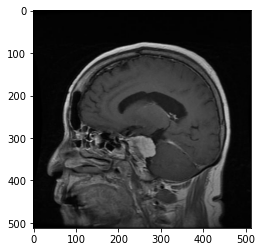

In [151]:
#Testing reading and displaying image file using os and opencv modules as well as potential method for filename indexing.
#Path to image files
img_path = 'dataset\image'
#testing filename indexing (NOT USED IN MAIN CODE)
number = 0
img_name = "IMAGE_" + str(number).zfill(4) + '.jpg'
full_path = os.path.join(img_path,img_name)
print(full_path)

#Code reads the image file based on the input arguement path and reads it in  grayscale (2nd input arguement)
img_array = cv2.imread(full_path,cv2.IMREAD_GRAYSCALE)
#cv2.imshow('image',img_array)

#Plot to show the first image obtained, should be IMAGE_000.jpg
plt.imshow(img_array, cmap='gray')
plt.show()

#The image printed out can be changed by changing the value of number variable.

In [123]:
#Verify pixel size of images
#in this case its 512 x 512 pixels = 262144 pixels
print(img_array.shape)

(512, 512)


## 5.2 Retrieving image files from image folder into notebook for pre-processing

In [167]:
#This code obtains all the pixel information of all 3000 images in the dataset and stores it in one list/array for further processing.

#Initialises empty list for population through for loop
image_data = []
#Setting the path to the images
file_path = 'dataset\image'

#For loop will run through all items in the directory listed, in this case the image folder containing all 3000 mri images in our dataset.
#x in this case will print out the full filename (in this case the name of each IMAGE_xxxx.jpg), therefore we can use it to generate paths to 
#All the images via the for loop.
for x in tqdm(os.listdir(file_path)):
    #Creates path to images per iteration
    image_path = os.path.join(file_path,x)
    #Reads the corresponding image using cv2.imread
    file_array = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    #Stores the image array information into the image_data list created. Append makes sure it adds information in order.
    image_data.append(file_array)

    #CODE FOR DEBUGGING
    #print(x)
    #plt.imshow(file_array, cmap='gray')  #graph it
    #plt.show()  #display! 
    #break   

100%|██████████| 3000/3000 [00:15<00:00, 188.10it/s]


In [168]:
#Converts list into an array for easier numerical manipulation
Imagedata_array = np.array(image_data)

#Verifies the for loop executed correctly, array and list should have 3000 entries.
print(len(Imagedata_array))
len(image_data)

3000


3000

In [169]:
#Verify the array dimensions.
#Array of imagedata is a 3D Array with 3000 elements with each element containing 512 x 512 pixel data in array format
print(Imagedata_array.shape)

(3000, 512, 512)


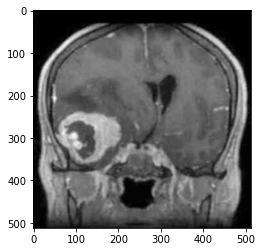

In [178]:
#testing array indexing and whether obtaining image data was successful by calling images in the array, inthis case the 3rd image IMAGE_0003.jpg.
# Order of array should match naming in original image file
plt.imshow(Imagedata_array[2,:], cmap='gray')
plt.show()

## 5.3 Image Dataset Cleaning: PCA
